In [1]:
import pandas as pd
import numpy as np

In [2]:
link = "https://www.bbc.com/sport/football/premier-league/table"

In [3]:
league_data = pd.read_html(link)[0]

In [4]:
league_data = league_data.loc[0:19,"Team":"Pts"]
league_data

,Team,P,W,D,L,F,A,GD,Pts
0,Arsenal,1,1,0,0,3,0,3,3
1,Leicester,1,1,0,0,3,0,3,3
2,Chelsea,1,1,0,0,3,1,2,3
3,Newcastle,1,1,0,0,2,0,2,3
4,Wolves,1,1,0,0,2,0,2,3
5,Liverpool,1,1,0,0,4,3,1,3
6,Crystal Palace,1,1,0,0,1,0,1,3
7,Everton,1,1,0,0,1,0,1,3
8,Aston Villa,0,0,0,0,0,0,0,0
9,Burnley,0,0,0,0,0,0,0,0


In [5]:
league_data.set_index("Team",inplace=True)

In [6]:
features = ["P","W","D","L","F","A","GD","Pts"]

for feature in features:
    league_data[feature] = league_data[feature].astype("int")
    
    

## Feature Engineering

In [7]:
league_data["win_ratio"] = round(league_data.W/league_data.P,2)

In [8]:
league_data["draw_ratio"] = round(league_data.D/league_data.P,2)

In [9]:
league_data["loss_ratio"] = round(league_data.L/league_data.P,2)

In [10]:
league_data["goals_scored_per_game_ratio"] = round((league_data.F/league_data.P),2)

In [11]:
league_data["total_goals_per_game_ratio"] = round(((league_data.F + league_data.A)/league_data.P),2)

In [12]:
league_data.replace(np.inf, 0,inplace=True)

In [13]:
league_data.fillna(0,inplace=True)

In [14]:
league_data

,P,W,D,L,F,A,GD,Pts,win_ratio,draw_ratio,loss_ratio,goals_scored_per_game_ratio,total_goals_per_game_ratio
Team,,,,,,,,,,,,,
Arsenal,1,1,0,0,3,0,3,3,1.0,0.0,0.0,3.0,3.0
Leicester,1,1,0,0,3,0,3,3,1.0,0.0,0.0,3.0,3.0
Chelsea,1,1,0,0,3,1,2,3,1.0,0.0,0.0,3.0,4.0
Newcastle,1,1,0,0,2,0,2,3,1.0,0.0,0.0,2.0,2.0
Wolves,1,1,0,0,2,0,2,3,1.0,0.0,0.0,2.0,2.0
Liverpool,1,1,0,0,4,3,1,3,1.0,0.0,0.0,4.0,7.0
Crystal Palace,1,1,0,0,1,0,1,3,1.0,0.0,0.0,1.0,1.0
Everton,1,1,0,0,1,0,1,3,1.0,0.0,0.0,1.0,1.0
Aston Villa,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [15]:
import matplotlib.pyplot as plt

## Win Ratios

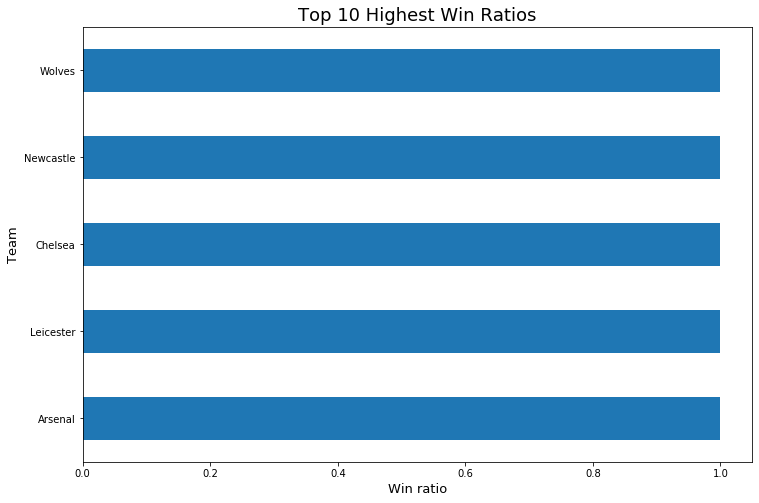

In [16]:
league_data.win_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Win ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Win Ratios",fontsize=18)
plt.show()

## Draw Ratios

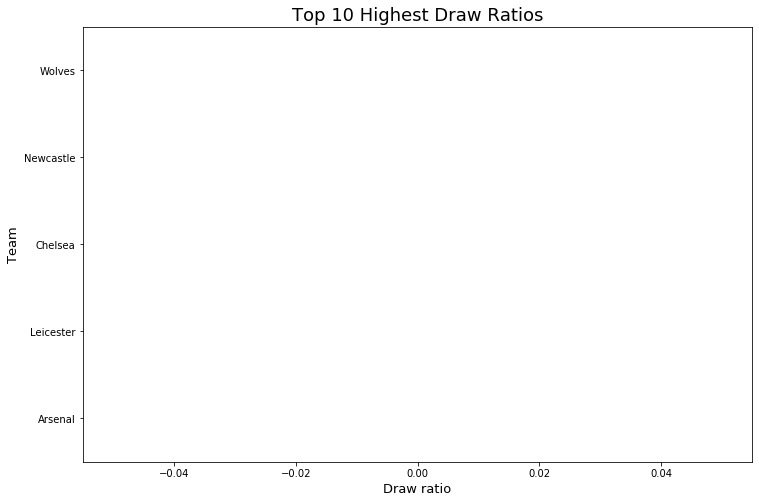

In [17]:
league_data.draw_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Draw ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Draw Ratios",fontsize=18)
plt.show()

## Loss Ratios

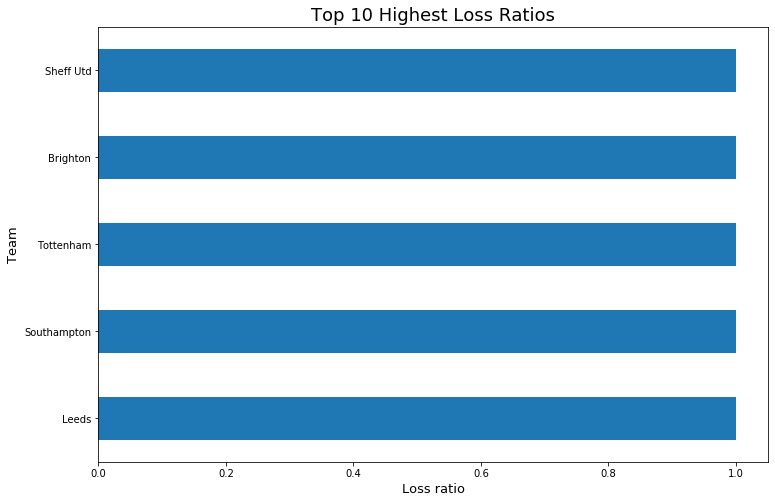

In [18]:
league_data.loss_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Loss ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Loss Ratios",fontsize=18)
plt.show()

## High Scoring Teams

In [19]:
high_scoring_teams = league_data["goals_scored_per_game_ratio"]
high_scoring_teams = high_scoring_teams.nlargest(5).to_frame()
high_scoring_teams

,goals_scored_per_game_ratio
Team,
Liverpool,4.0
Arsenal,3.0
Leicester,3.0
Chelsea,3.0
Leeds,3.0


In [20]:
high_goals_averaging_teams = league_data["total_goals_per_game_ratio"]
high_goals_averaging_teams = high_goals_averaging_teams.nlargest(5).to_frame()
high_goals_averaging_teams

,total_goals_per_game_ratio
Team,
Liverpool,7.0
Leeds,7.0
Chelsea,4.0
Brighton,4.0
Arsenal,3.0
